【导语】 当你在搜索框输入一串简短的文本后，搜索引擎立马会返回成千上万条结果，整个搜索过程看似简单，其实底层引擎大有文章。每一个简短的搜索词背后都隐藏着用户最真实的查询意图，需要搜索引擎使用很多不同策略去挖掘用户背后的需求，这就涉及到“搜索query理解”

搜索引擎的运行逻辑：\
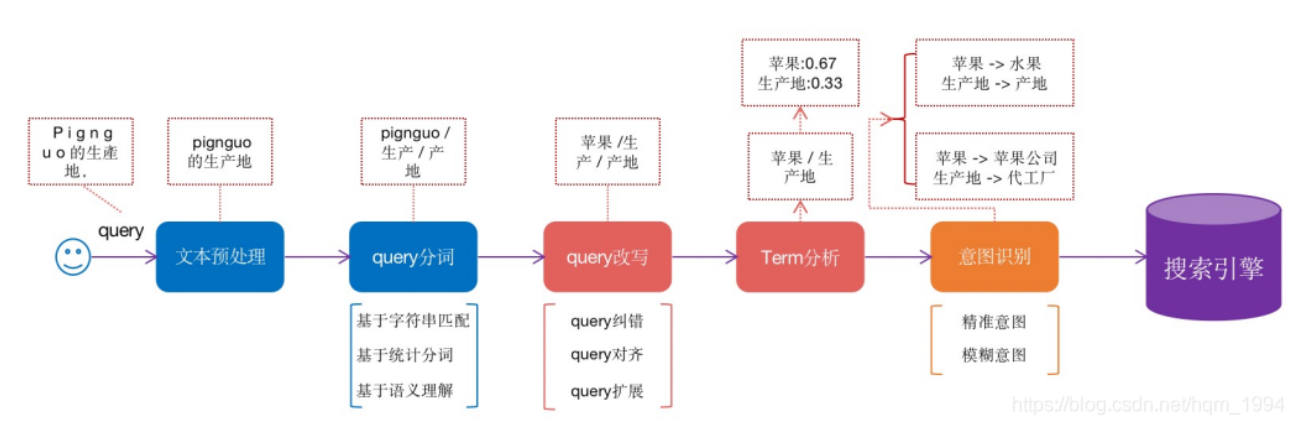

#### 1.文本处理
#### 2.query分词
#### 3.query改写
#### 4.query分析
#### 5.意图识别

# 1.文本处理

大小写转换：query会转为“p i g n g u o 的生產地。”\
全半角转化：query会转为“pignguo的生產地”\
长度截断：一般设置为38\
繁简体转化等策略：query会转为“pignguo的生产地”

# 2.query分词

**【基于字符匹配的分词算法】**\
此种方案首先需要构造分词词典，将一串文本的文字分段与构建好的分词词典进行字符串匹配，如若匹配上，则作为一个分词结果。此种原始方案有很多缺点，比如无法处理歧义，泛化性不够等问题，当然现在有很多改进方案，比如正向/逆向/双向最大匹配算法。

**【基于统计的分词算法】**\
基于大量的分词文本，利用统计概率学知识，对文本的相邻字之间的频度进行统计，计算字与字之间的连接概率，并依托机器学习模型，学习文本切分的客观规律 ，可实现对未知文本的切分。\
统计语言模型需要依赖大量的训练数据，随着互联网大数据时代的到来，也给统计语言模型带来的质的发展，这也使得统计语言模型渐渐的成为了主流分词方法。我们最熟悉的莫过于基于稀疏表示（Sparse Representation）的N-Garm语言模型，还有隐马尔科夫HMM、条件随机场CRF等模型。随着深度学习的崛起，以词向量（Word Embedding）为代表的语言模型也去得到了更好的效果，给NLP分词算法领域带来了变革。


**【基于理解的分词算法】**\
基于理解的分词算法，其基本思想就是在分词的同时进行句法、语义分析，利用句法信息和语义信息来处理歧义现象，即它是模拟人对于句子的理解来处理文本中的各种歧义。随着NLP领域的不断突破，基于理解的分词算法也得到快速的发展，目前比较常用的有，哈工大语言技术平台LTP、中科院计算所NLPIR、清华大学THULAC还有Hanlp等，以上这些平台都集成了基于理解的分词算法，效果都还不错。

**每一种分词算法都有其优劣，在搜索引擎开发过程中，应跟随场景的不同来选择其最合适的分词方法。**

# 3.query改写

query改写分为：query纠错、query对齐、query扩展

【query纠错】

query纠错，为什么搜索引擎需要这个步骤？原因是我们在搜索过程中由于对先验知识的掌握不足或者在使用输入法的时候误输入导致的，如果不进行纠错，最终带来的搜索列表将不会是用户想要的结果，使得搜索准确率下降，用户体验下降，例如百度中搜索“胡哥”：
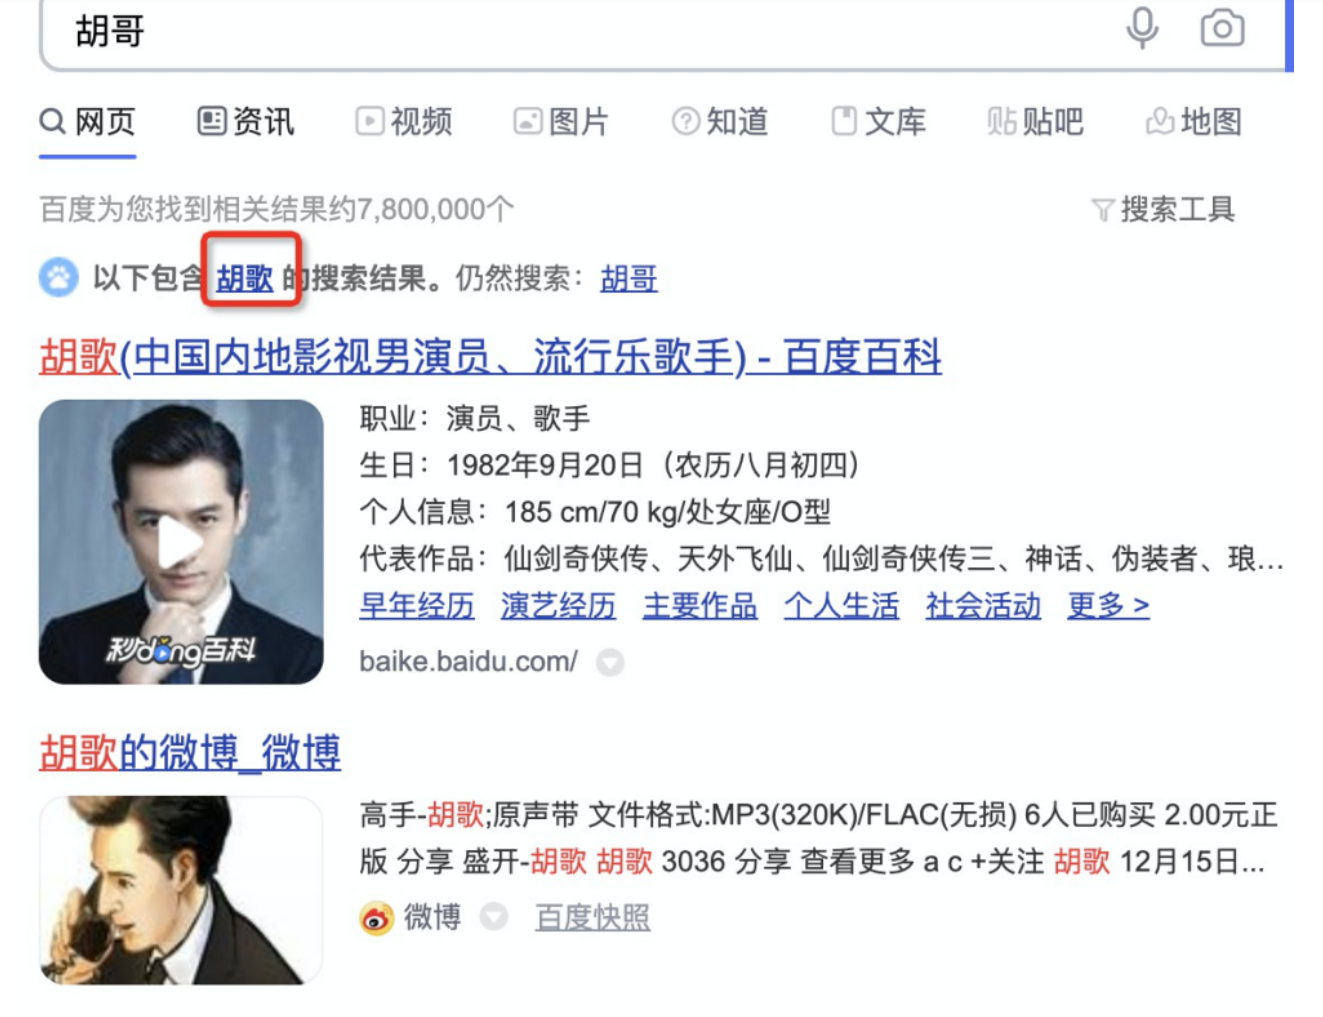

所以在我们做搜索引擎的过程中，query纠错是个比较重要的步骤，当然不同的场景使用的纠错方式是不同的。常用的query纠错方法有数字、拼音、漏字、重复字、谐音/形近字等方式，那我们本文的案例来讲，“pignguo的生产地。”会被纠正为“苹果的生产地。”，而“苹果”本身也是用户想要搜索的内容。

query纠错从技术上来讲主要分成两个任务，一个**异常检测**，一个是**错误纠正**，基础的实现方法有基于文本相似度（例如“胡哥”和“胡歌”很相似）、基于文本编辑距离（设定阈值，比如像“serach”与“search”编辑距离为1）、基于拼音实现纠正（“pingguo”纠正成“苹果”）等。当然还有一些更高级方案，所谓更高级，就是实现难度大点，比如基于点击行为的queryN-docN 协同过滤算法纠正，可将历史queryN-docN的点击构建点击行为矩阵，采用协同过滤计算query与queryN的相似度来纠错。还有基于session embedding挖掘更多的query序列进行纠错。

【实体对齐】

实体对齐与query纠错容易混淆，实体对齐更多的是对于输入query并无错误，但表达上与搜索引擎索引内容不相符而作的一种改写操作。例如“星爷是哪一年生的”，通过实体对齐，可改写为“周星驰的出生时间”，对齐规则也是一个不断丰富、不断积累的过程。

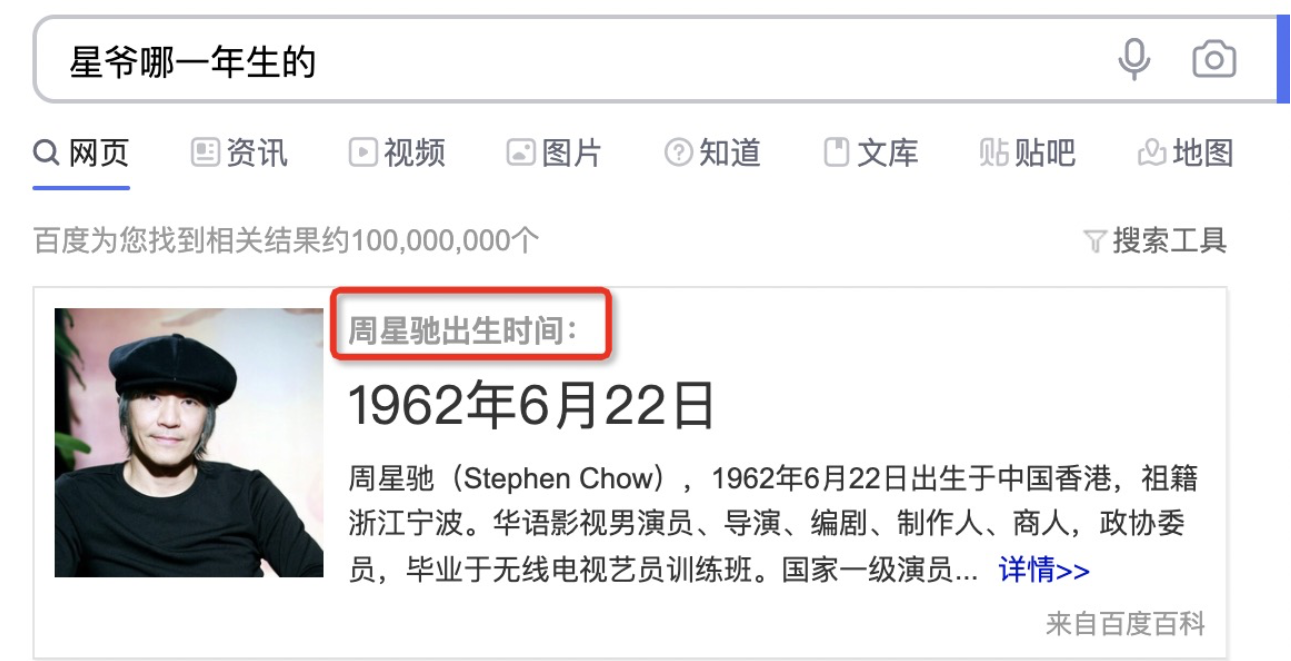

技术实现上可使用word Embedding方法来训练词与词之间的相似度来确定一套对齐规则，这里同时也需要添加一些外部知识或者人工干预来提升相似的准确性。还可通过文本生成模型seq2seq，基于历史点击行为挖掘出query-query语义相近短语来确定一套对齐规则

**【query扩展】**

query扩展主要用于搜索引擎的相关搜索，是将与用户输入的query的相似扩展query进行展示，使得用户可以更多选择的搜索想要的内容，帮助用户挖掘潜在需求，同时也可扩大搜索的流量和召回，技术实现上比较简单，可使用query纠错和实体对齐中的方法来实现，但也需要不断的迭代优化。如下是百度输入“胡歌”的结果

# 4.query分析

query分析最主要的是权重分析，常用的方法有tfidf算法，即“词频-逆文本频率”，如果某个词或短语在一篇文章中出现的频率高（即TF高），并且在其他文章中很少出现（即IDF高），则认为此词或者短语具有很好的类别区分能力，此时权重就会比较高。

除此之外，权重分析也可使用分类或回归思想来解决，通过训练svm、gbdt等传统机器学习模型即可进行预测。即可以使用历史点击数据，**首先可根据不同的query点击同一个title进行聚类，再通过一系列文本特征处理方式将多个query的term权重进行加权即可分析其权重**。

# 5.意图识别

在一般的搜索场景，意图识别可以分为两个任务实现，**意图分类+命名实体识别**。分类模型可以基于传统的机器学习，比如svm，朴素贝叶斯以及决策树算法算法，也可基于深度学习模型，比如近几年比较火的bert。命名实体识别任务可以使用Bert-BiLSTM-CRF、BERT-CRF等序列标注模型进行item实体的识别，再结合一些启发性策略及后验行为进行验证。

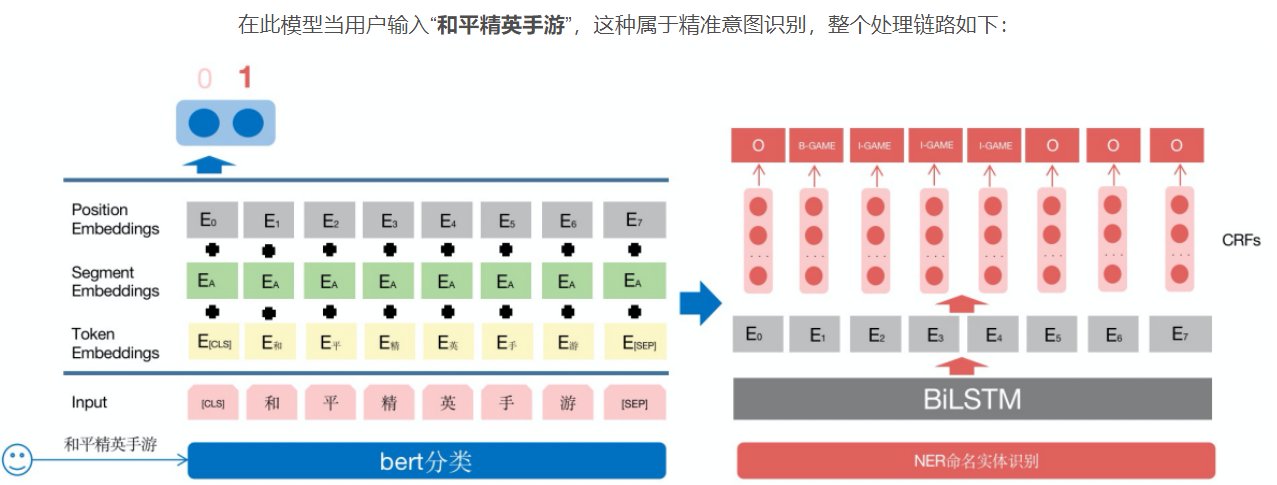

据统计，搜索符合2/8原则，80%的query都是长尾词，很多情况用户意图比较模糊，还不确定是否有一些强意图的时候，更适合给到用户的则是一些统计类、榜单类的结果，比如用户搜索“2020好玩的三国策略游戏”，此时的意图就比较模糊，搜索结果返回一系列三国策略游戏方才是用户的真实意图。

当然很多时候，意图识别也会加入个性化元素，那我们本文的第一案例“苹果的生产地”，具体是指**水果苹果的产地？还是苹果手机、电脑的代工厂？**这就需要涉及到个性化搜索了。不仅如此，当query词中出现一些进阶关系，即query中的实体并非意图实体，需要加推理挖掘其真实实体，这时就要加入知识图谱进行知识推理，结合语义搜索完成意图识别，如下图：
